# Examples of planar shapes

In [1]:
import sys
sys.path.insert(0,'..')
from pymanopt.manifolds import ComplexGrassmann
import numpy as np
from PNG import *
from PGA import *
from Complex_PCA import *
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from shape_transform import *
import rpy2.robjects as robjects
import pandas as pd
from plotnine import ggplot, aes, geom_line, labs

In [2]:
def example(data, n_c, **kwargs):
    X = np.load(data)
    X = X.transpose((1,2,0))
    X = shape_transform(X)
    
    scores_PNG = PNG(X, **kwargs)
    
    n_c = 5
    cpca = Complex_PCA(n_components = n_c)
    cpca.fit(scores_PNG)
    #cpca = PCA(n_components = n_c)
    #cpca.fit(np.hstack((scores_PNG.real, scores_PNG.imag)))

    
    N, n, p = X.shape
    man = ComplexGrassmann(n, p)
    cpga = Complex_PGA(X, n_c, man)
    
    #FM = compute_centroid(man, X)
    #logX = np.zeros(X.shape, dtype = X.dtype)
    #logX = logX.reshape((N, -1))
    #for i in range(N):
    #    logX[i] = man.log(FM, X[i]).reshape(-1)
    
    #cpga = PCA(n_components = n_c)
    #cpga.fit(np.hstack((logX.real, logX.imag)))

    
    pnss_ratio = robjects.r('''
                         library(shapes)
                         sink("/dev/null")
                         out <- pnss3d({}, n.pc = {})
                         sink()
                         out$percent   
                         '''.format(data.replace('npy','dat'), 2*n_c))
    
    plt.rcParams.update({'font.size': 16})
    plt.plot(np.linspace(1,n_c, n_c), np.cumsum(cpca.explained_variance_ratio_)*100, '-', linewidth=3)
    plt.plot(np.linspace(1,n_c, n_c), np.cumsum(cpga.explained_variance_ratio_)*100, '--', linewidth=3)
    plt.plot(np.linspace(1,n_c, n_c), np.cumsum(pnss_ratio)[np.arange(1, 2*n_c, 2)], '-.', linewidth=3)
    plt.xlabel('Principal Components')
    plt.ylabel('Cum. Var. (%)')
    plt.legend(['PNG', 'PGA', 'PNSS'], loc='lower right')
    plt.title('Dataset: '+'{}'.format(data.replace('.npy', '')))
    plt.tight_layout()
    plt.savefig(data.replace('npy', 'pdf'))
    plt.show()
    
    

## Digit 3 

Gr(1, 12) -> Gr(1, 11)
Terminated - min grad norm reached after 110 iterations, 2.82 seconds.

Gr(1, 11) -> Gr(1, 10)
Terminated - max iterations reached after 24.99 seconds.

Gr(1, 10) -> Gr(1, 9)
Terminated - max iterations reached after 25.54 seconds.

Gr(1, 9) -> Gr(1, 8)
Terminated - max iterations reached after 25.17 seconds.

Gr(1, 8) -> Gr(1, 7)
Terminated - min grad norm reached after 683 iterations, 16.82 seconds.

Gr(1, 7) -> Gr(1, 6)
Terminated - max iterations reached after 24.28 seconds.

Gr(1, 6) -> Gr(1, 5)
Terminated - min grad norm reached after 170 iterations, 4.17 seconds.

Gr(1, 5) -> Gr(1, 4)
Terminated - min grad norm reached after 101 iterations, 2.40 seconds.

Gr(1, 4) -> Gr(1, 3)
Terminated - min grad norm reached after 86 iterations, 1.99 seconds.

Gr(1, 3) -> Gr(1, 2)
Terminated - min grad norm reached after 50 iterations, 1.18 seconds.

Gr(1, 2) -> NGM


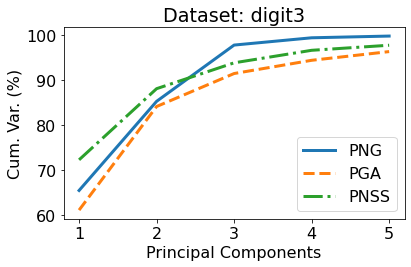

In [3]:
example('digit3.npy', 5, log = True, verbosity = 1)

## Female Gorilla

Gr(1, 7) -> Gr(1, 6)
Terminated - min grad norm reached after 56 iterations, 1.46 seconds.

Gr(1, 6) -> Gr(1, 5)
Terminated - min grad norm reached after 118 iterations, 2.87 seconds.

Gr(1, 5) -> Gr(1, 4)
Terminated - min grad norm reached after 160 iterations, 3.80 seconds.

Gr(1, 4) -> Gr(1, 3)
Terminated - min grad norm reached after 70 iterations, 1.63 seconds.

Gr(1, 3) -> Gr(1, 2)
Terminated - min grad norm reached after 36 iterations, 0.87 seconds.

Gr(1, 2) -> NGM


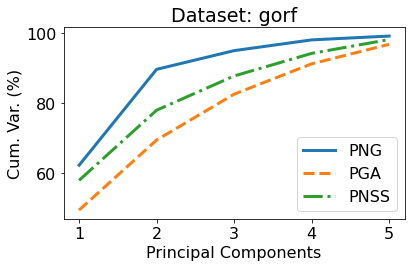

In [4]:
example('gorf.npy', 5, log = True, verbosity = 1)

## Male Gorilla

Gr(1, 7) -> Gr(1, 6)
Terminated - max iterations reached after 23.92 seconds.

Gr(1, 6) -> Gr(1, 5)
Terminated - max iterations reached after 25.40 seconds.

Gr(1, 5) -> Gr(1, 4)
Terminated - max iterations reached after 24.16 seconds.

Gr(1, 4) -> Gr(1, 3)
Terminated - min grad norm reached after 78 iterations, 1.68 seconds.

Gr(1, 3) -> Gr(1, 2)
Terminated - min grad norm reached after 68 iterations, 1.42 seconds.

Gr(1, 2) -> NGM


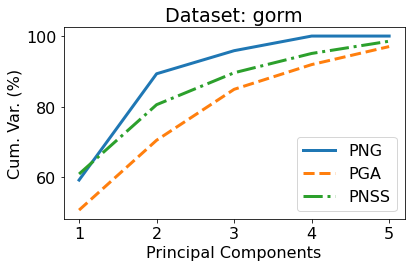

In [5]:
example('gorm.npy', 5, log = True, verbosity = 1)